<a href="https://colab.research.google.com/github/wldud01/Pytorch_tutorial/blob/main/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title basic module
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
# random seed
torch.manual_seed(100)

In [ ]:
csv_list = glob.glob('*.csv')

In [ ]:
unix_time_list = []
for csv in csv_list:
  unix_date = pd.to_datetime(csv.split(".")[0],unit="s")
  unix_time_list.append(unix_date)
unix_time_list

<ipython-input-15-7c13e9b75c15>:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  unix_date = pd.to_datetime(csv.split(".")[0],unit="s")


[Timestamp('2020-08-31 00:04:16'),
 Timestamp('2020-09-02 22:47:28'),
 Timestamp('2020-09-01 02:40:00')]

In [ ]:
file_name = glob.glob('*.csv')[0]
df = pd.read_csv(file_name)
df['date'] = unix_time_list[0]
df.head()

,timestamp,hr,date
0,24.0,63.0,2020-08-31 00:04:16
1,25.0,67.0,2020-08-31 00:04:16
2,26.0,62.0,2020-08-31 00:04:16
3,27.0,65.5,2020-08-31 00:04:16
4,28.0,62.8,2020-08-31 00:04:16


In [ ]:
for idx, csv in enumerate(csv_list[1:]):
  sub_df = pd.read_csv(csv)
  sub_df['date'] = unix_time_list[idx+1]
  df = pd.concat([df,sub_df], axis = 0)
df.head()

,timestamp,hr,date
0,24.0,63.0,2020-08-31 00:04:16
1,25.0,67.0,2020-08-31 00:04:16
2,26.0,62.0,2020-08-31 00:04:16
3,27.0,65.5,2020-08-31 00:04:16
4,28.0,62.8,2020-08-31 00:04:16


In [ ]:
hr_median = df.groupby("date")['hr'].median().values

In [ ]:
df['date'].value_counts()

date
2020-09-01 02:40:00    60
2020-09-02 22:47:28    42
2020-08-31 00:04:16    36
Name: count, dtype: int64

<Axes: >

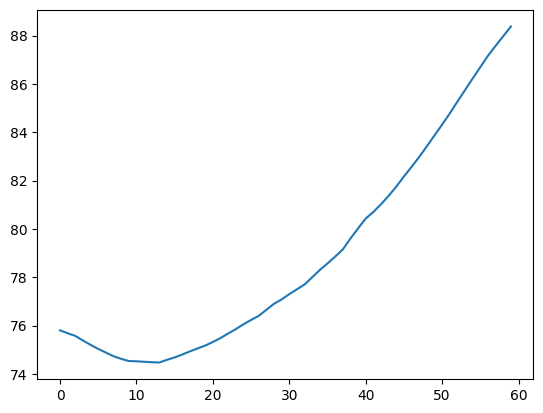

In [ ]:
df[df['date'] == unix_time_list[-1]]['hr'].plot()

In [ ]:
#@title Trian and test data
x_train = torch.FloatTensor(hr_median.reshape(-1,1))
y_train = torch.FloatTensor([[1],[1],[0]])

print(x_train)
print(x_train.shape)
print(y_train.shape)

tensor([[ 63.5800],
        [ 77.1900],
        [150.0600]])
torch.Size([3, 1])
torch.Size([3, 1])


In [ ]:
#@title initialize weight and bias
# 가중치를 0으로 초기화, 학습을 통해 변경되는 것을 명시
W = torch.zeros(1,requires_grad = True)
# print weight
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1,requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 현재 모형 : y = 0xX+0

# hypothesis - 선형 회귀 모형
H = x_train*W +b
print(H)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
#@title cost function : mean squared error
# 평균 최소 제곱 수식을 그대로 구현
cost = torch.mean((H - y_train)**2)
print(cost)

tensor(0.6667, grad_fn=<MeanBackward0>)


In [ ]:
#@title Optimizer
optimizer = optim.SGD([W,b],lr=0.01)

In [ ]:
# zero_grad를 통해서 미분을 통해 얻은 기울기를 0으로 초기화
print(optimizer.zero_grad())
# backpropagation : 기울기 계산
print(cost.backward())
# step함수에서 파라미터 업데이트
print(optimizer.step())

None
None
None


In [ ]:
epochs = 5
for epoch in range(epochs):
  h = x_train*W +b

  cost = torch.mean((h-y_train)**2)

  # parameter update
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print(f"epoch : {epoch} , W :{W.item()}, b:{b.item()}, cost:{cost.item()} ")


epoch : 0 , W :-201.60047912597656, b:-1.7931618690490723, cost:9461.62890625 
epoch : 1 , W :43508.07421875, b:389.13250732421875, cost:440639072.0 
epoch : 2 , W :-9389424.0, b:-83974.9921875, cost:20522073063424.0 
epoch : 3 , W :2026320128.0, b:18122544.0, cost:9.557833990736445e+17 
epoch : 4 , W :-437297709056.0, b:-3911004672.0, cost:4.451411464528564e+22 


In [ ]:
import torch

w = torch.tensor(2.0,requires_grad =True)
epochs = 20

for epoch in range(epochs):
  z = 2*w


  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0


In [ ]:
# train test data 준비하기
x_train = torch,FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([2],[4],[6])

W = torch,zeros(1,requires_grad =True)
b = torch.zeros(1,requires_grad =True)

# hypothesis
hypothesis = W*x_train + b
# cost function
cost = torch.mean((hypothesis-y_train)**2)

# optimizer , zero_grad ,update가 이뤄짐
optimizer = optim.SGD([W,b], lr = 0.01)

epochs = 2
for epochs in range(epochs):
  hypothesis = W*x_train +b

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


  print(f"epoch")